# WZL Automobile Data processing

Objective: identify if a coil is somehow different from existing observations.()

In [1]:
import csv
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
#from scipy import stats
import tensorflow as tf
#import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
import io
import os

path=r"/home/nvidia"
filename = path + '/Datenbasis_Gefiltert.csv'
df = pd.read_csv(filename, usecols=['Position', 'CoilNumber','ProgramNumber630','Banddicke1','Banddicke2','Banddicke3','Banddicke','Impoc'])
#df = df.dropna(axis=0,subset=['Banddicke2','Impoc'])
df

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ProgramNumber630,Position,CoilNumber,Banddicke,Banddicke1,Banddicke2,Banddicke3,Impoc
0,130,5.504,962167,0.7,NaN,NaN,NaN,2426.0
1,130,8.944,962167,0.7,NaN,NaN,NaN,2671.0
2,130,12.384,962167,0.7,NaN,NaN,NaN,2715.0
3,130,15.824,962167,0.7,NaN,NaN,NaN,2798.0
4,130,19.264,962167,0.7,NaN,NaN,NaN,2913.0
5,130,22.704,962167,0.7,NaN,NaN,NaN,2866.0
6,130,26.144,962167,0.7,NaN,NaN,NaN,2814.0
7,130,29.584,962167,0.7,NaN,NaN,NaN,2804.0
8,130,33.024,962167,0.7,NaN,NaN,NaN,2794.0
9,130,36.464,962167,0.7,NaN,NaN,NaN,2778.0


## Step 2

After loading the Columns we wanted, we'd better combine the two table(with producer)

In [2]:
zrd=pd.read_csv(os.path.join(path,'Zuordnung.csv'),header=0,sep=',')
zrd.rename(index=str,columns ={'programm_coil':'ProgramNumber630',
'material gemaess SAP':'Material',
'Hersteller/Schluessel':'Hersteller'},inplace = True)
print('length zrd {:d}'.format(len( zrd.loc[:,'ProgramNumber630'].unique() ) ) )
print('length df {:d}' .format(len( df.loc[:,'ProgramNumber630'].unique() ) ) )
print(df.shape)

df=pd.merge(df, zrd, how='left', on=['ProgramNumber630'])
print(df.shape)
df.to_pickle(os.path.join(path,'Datenbasis_Gefiltert_zusammengefuehrt.csv'))
df.keys()
df

length zrd 19
length df 16
(1595738, 8)
(1595738, 11)


,ProgramNumber630,Position,CoilNumber,Banddicke,Banddicke1,Banddicke2,Banddicke3,Impoc,Material,Hersteller,Coilbreite
0,130,5.504,962167,0.7,NaN,NaN,NaN,2426.0,DX54D + Z100 MCO,CV,1550
1,130,8.944,962167,0.7,NaN,NaN,NaN,2671.0,DX54D + Z100 MCO,CV,1550
2,130,12.384,962167,0.7,NaN,NaN,NaN,2715.0,DX54D + Z100 MCO,CV,1550
3,130,15.824,962167,0.7,NaN,NaN,NaN,2798.0,DX54D + Z100 MCO,CV,1550
4,130,19.264,962167,0.7,NaN,NaN,NaN,2913.0,DX54D + Z100 MCO,CV,1550
5,130,22.704,962167,0.7,NaN,NaN,NaN,2866.0,DX54D + Z100 MCO,CV,1550
6,130,26.144,962167,0.7,NaN,NaN,NaN,2814.0,DX54D + Z100 MCO,CV,1550
7,130,29.584,962167,0.7,NaN,NaN,NaN,2804.0,DX54D + Z100 MCO,CV,1550
8,130,33.024,962167,0.7,NaN,NaN,NaN,2794.0,DX54D + Z100 MCO,CV,1550
9,130,36.464,962167,0.7,NaN,NaN,NaN,2778.0,DX54D + Z100 MCO,CV,1550


## Step 3

* denoising

1. dropna
2. delete duplicate
3. choose only one Hersteller.

In [3]:
# as for the precision round(3)
df.dropna(axis=0, how='any',inplace=True)
df.round(3)
df.drop_duplicates(subset=['Position'],inplace=True)
df.shape



(539394, 11)

## Step 3.1 

let's say we choose the `Hersteller CV` and the `Branddicke=0.7`


In [4]:
df_cv = df.loc[(df['Hersteller'] == 'CV') & (df['Banddicke'] == 0.7)]
#df_cv = df_cv.drop(columns = ['CoilNumber','Material','Hersteller'])
#df_cv

## Step 4

before we start our training, we can take a deeper look inside of our data to say what's good or not.

1. group the data by the coilnumber

c:\users\xiaoli yang\appdata\local\programs\python\python35\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


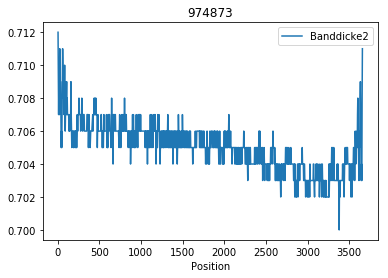

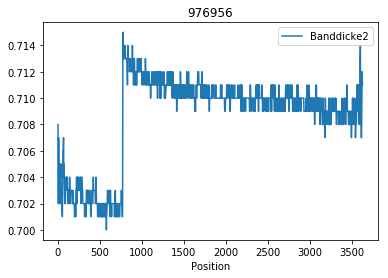

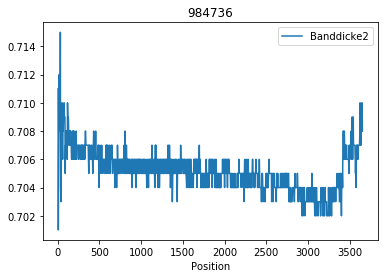

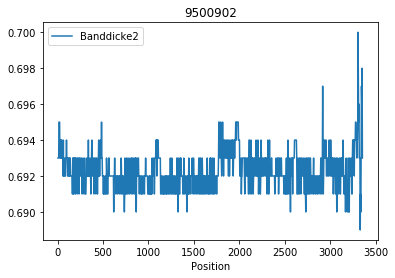

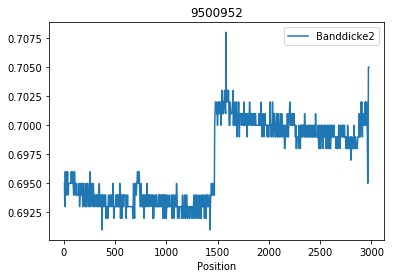

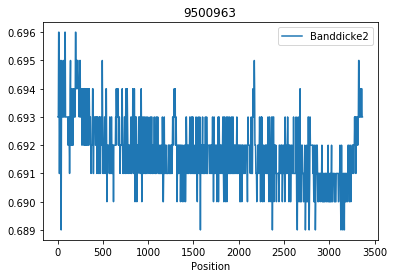

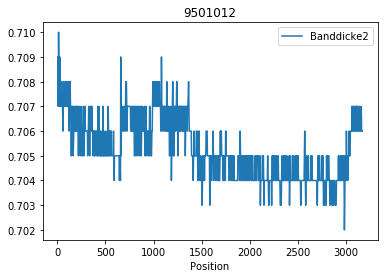

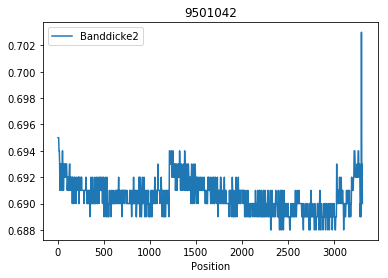

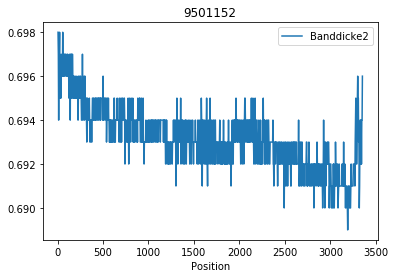

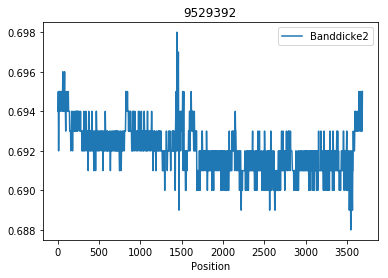

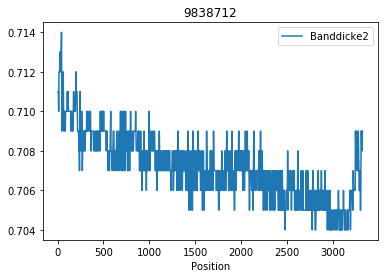

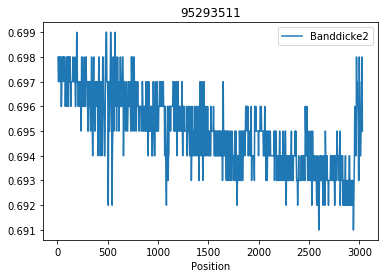

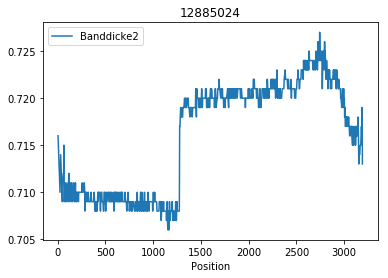

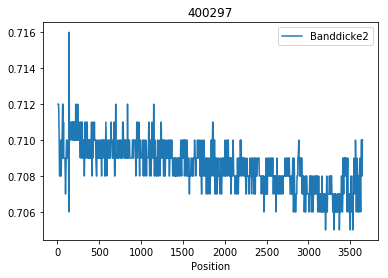

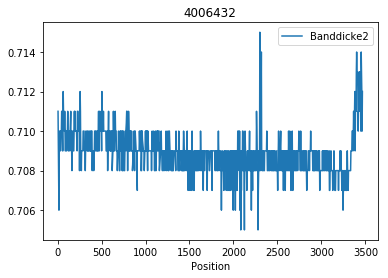

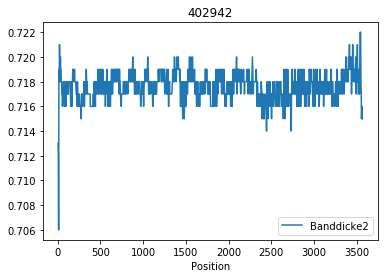

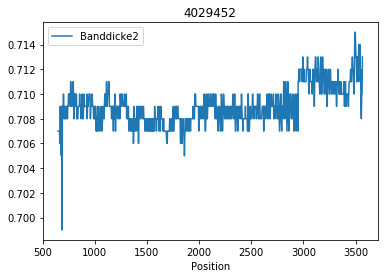

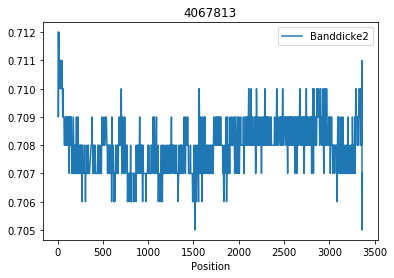

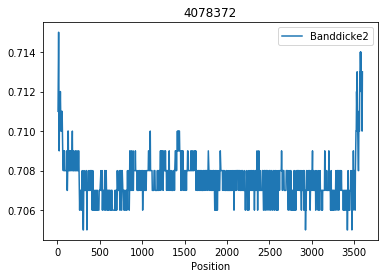

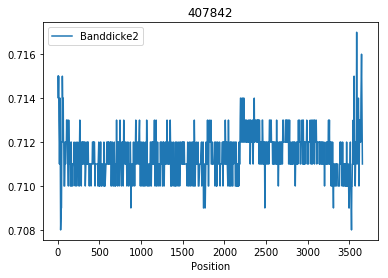

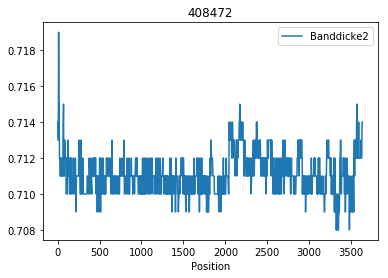

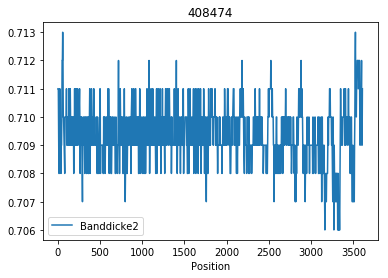

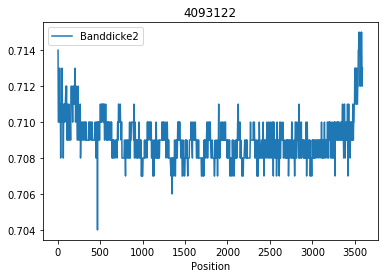

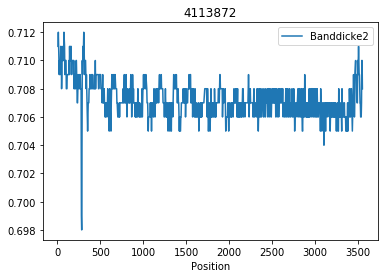

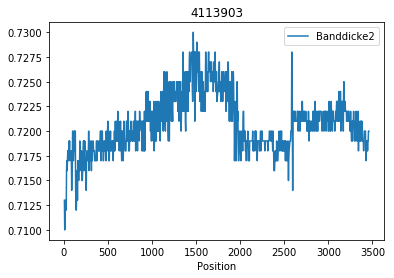

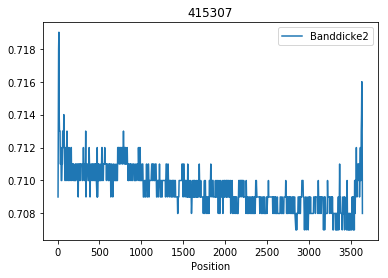

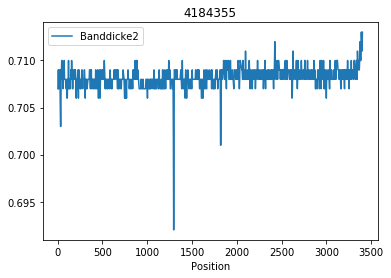

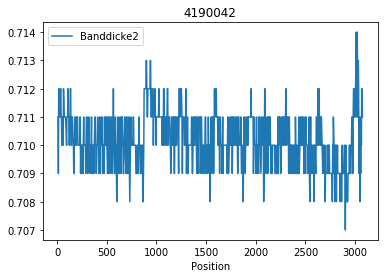

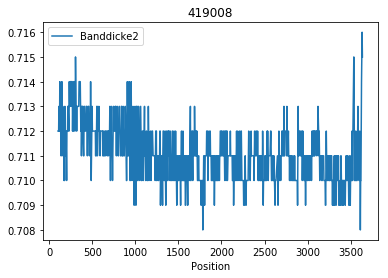

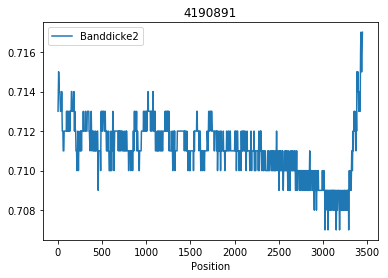

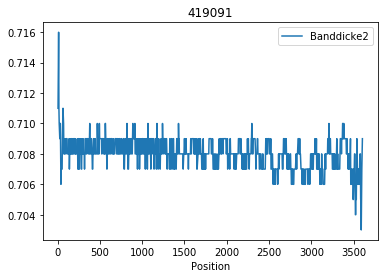

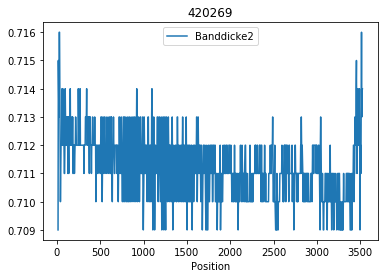

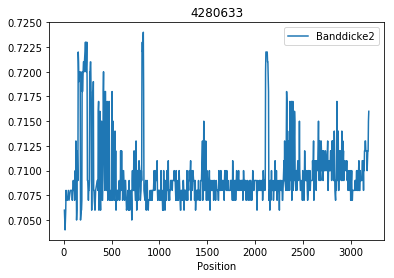

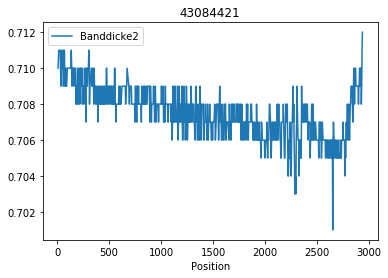

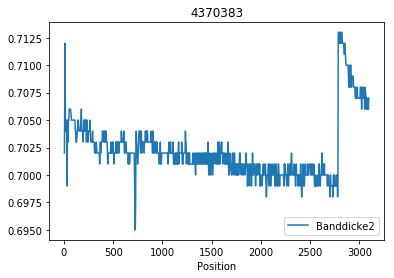

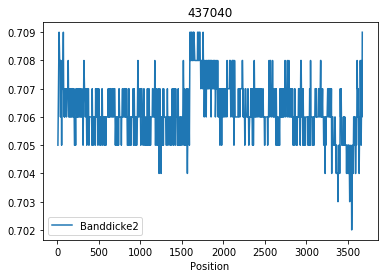

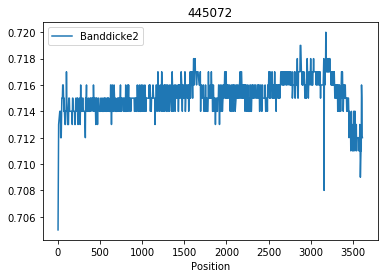

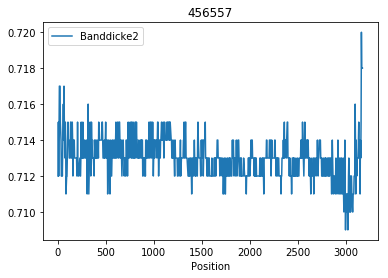

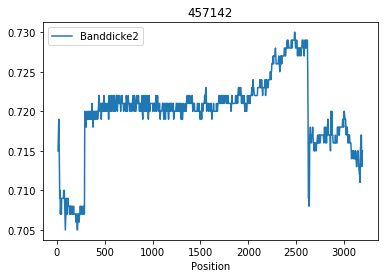

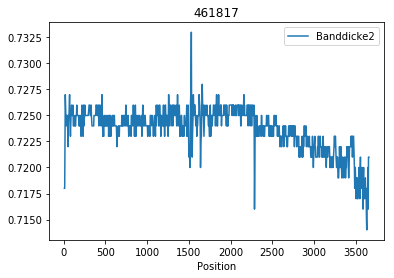

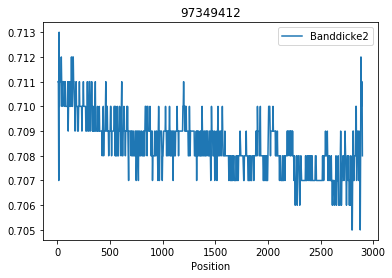

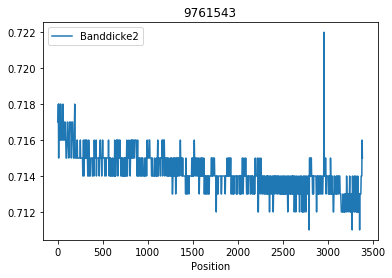

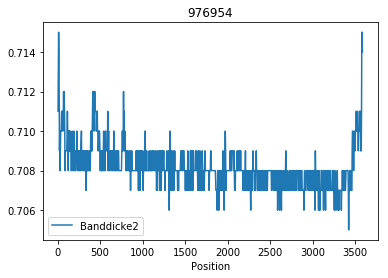

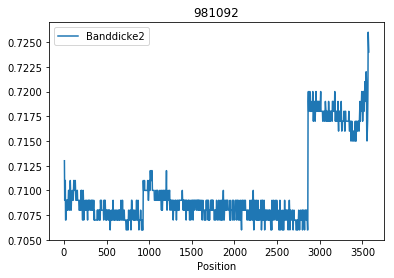

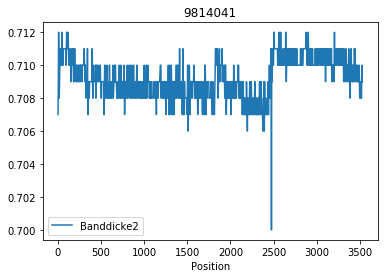

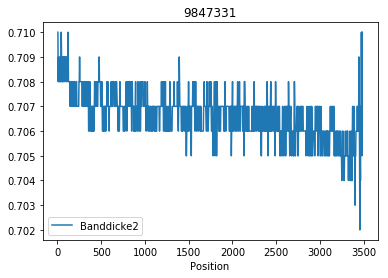

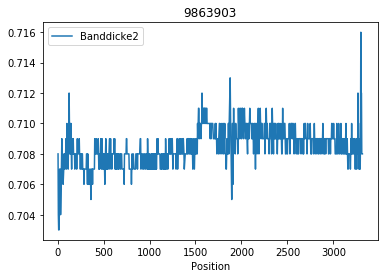

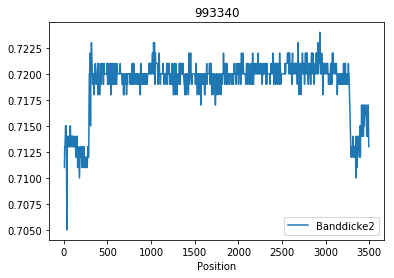

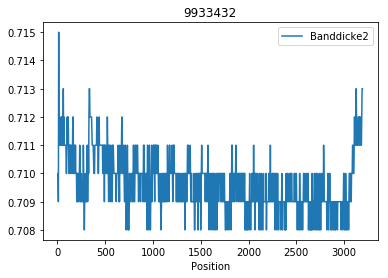

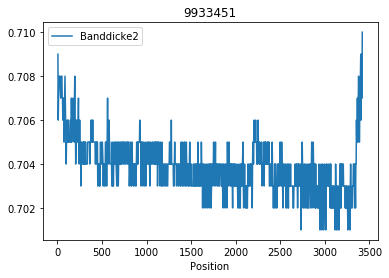

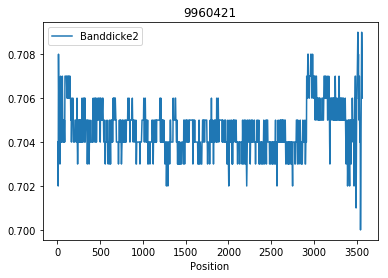

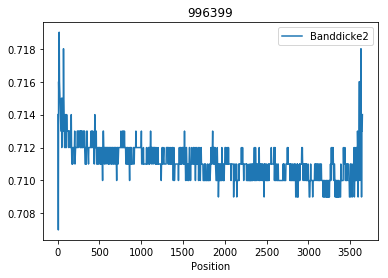

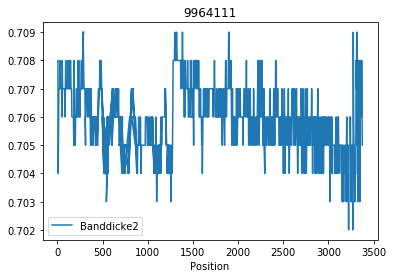

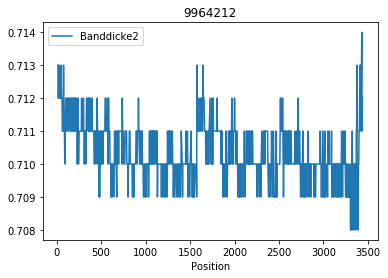

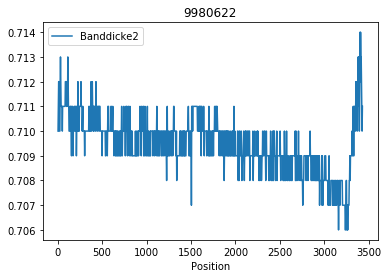

In [5]:
coilNr = df_cv.drop_duplicates(subset=['CoilNumber'], keep='last', inplace=False).CoilNumber.values # it will return a series.
i=1
for s in df_cv.groupby('CoilNumber'):
   #print(s[1]['Banddicke2'].values)
    if(s[1].size<8000):
        continue
    xx = pd.DataFrame({'Position':s[1]['Position'].values,'Banddicke2':s[1]['Banddicke2'].values})
    #print(s[1].size)
    xx.plot(x='Position',y='Banddicke2',title=s[0])

## Step 4.1 Setup the Autoencoder based on Tensorflow

here


In [34]:
# reform the data into matrix as a unit
# s in df_cv.groupby('CoilNumber'):
import random

df_matrix = pd.DataFrame([])

# how long the step size should be
Step = 500

for s in df_cv.groupby('CoilNumber'):
    
    #matrx = pd.DataFrame([s[1].Position.values, s[1].Banddicke1.values, s[1].Banddicke2.values, s[1].Banddicke3.values])
    #matrx = np.split(',')
    #matrx = np.transpose(matrx)
    #comp = Step - (matrx.shape[0] % Step)
    #new = matrx[-1]
    #new = np.tile(new, comp)
    #length = matrx.shape[0]
    #matrx = np.append(matrx,new).shape(length+comp,4)
    comp = Step - s[1].shape[0] % Step
    matrx = s[1].filter(items=['Position', 'Banddicke1','Banddicke2','Banddicke3'])
    ran = matrx[-1:]['Position'].values[0]
    for i in range(int(comp)):
        ranPos = round(random.uniform(1, ran), 3)
        d2 = pd.DataFrame([[ranPos,0.7,0.7,0.7]], columns= ['Position', 'Banddicke1', 'Banddicke2', 'Banddicke3'])
        matrx = matrx.append(d2)
    df_matrix = df_matrix.append(matrx)
    #print(s[1].filter(items=['Position', 'Banddicke1','Banddicke2','Banddick3']))
    
df_matrix.drop('Position',axis = 1, inplace = True)


* 3x3 network(3 layers encoders and 3 layers decoders).


In [35]:
from sklearn.preprocessing import StandardScaler

RANDOM_SEED = 42

X_train, X_test = train_test_split(df_matrix, test_size=0.25, random_state=RANDOM_SEED)

X_train = X_train.values
X_test = X_test.values


X_train = X_train.reshape(int(len(X_train)/500), 3*500)
X_test = X_test.reshape(int(len(X_test)/500), 3*500)

input_dim = X_train.shape[1]
encoding_dim = 250

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 5), activation="relu")(encoder)
encoder = Dense(int(encoding_dim / 25), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 5), activation='tanh')(encoder)
decoder = Dense(int(encoding_dim / 25), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)


## Step 5
train the module for 100 Epoch

In [9]:
import h5py

nb_epoch = 500
batch_size = 30
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history



Train on 117 samples, validate on 39 samples
Epoch 1/500
117/117 [==============================] - 0s 3ms/step - loss: 0.5367 - acc: 0.0000e+00 - val_loss: 0.3932 - val_acc: 0.0000e+00
Epoch 2/500
117/117 [==============================] - 0s 1ms/step - loss: 0.4456 - acc: 0.0000e+00 - val_loss: 0.4152 - val_acc: 0.0000e+00
Epoch 3/500
117/117 [==============================] - 0s 2ms/step - loss: 0.4312 - acc: 0.0000e+00 - val_loss: 0.3898 - val_acc: 0.0000e+00
Epoch 4/500
117/117 [==============================] - 0s 2ms/step - loss: 0.3895 - acc: 0.0000e+00 - val_loss: 0.3500 - val_acc: 0.0000e+00
Epoch 5/500
117/117 [==============================] - 0s 2ms/step - loss: 0.3625 - acc: 0.0000e+00 - val_loss: 0.3346 - val_acc: 0.0000e+00
Epoch 6/500
117/117 [==============================] - 0s 2ms/step - loss: 0.3531 - acc: 0.0000e+00 - val_loss: 0.3212 - val_acc: 0.0000e+00
Epoch 7/500
117/117 [==============================] - 0s 2ms/step - loss: 0.3385 - acc: 0.0000e+00 - val_los

117/117 [==============================] - 0s 1ms/step - loss: 0.3106 - acc: 0.0000e+00 - val_loss: 0.2861 - val_acc: 0.0000e+00
Epoch 59/500
117/117 [==============================] - 0s 1ms/step - loss: 0.3015 - acc: 0.0000e+00 - val_loss: 0.2874 - val_acc: 0.0256
Epoch 60/500
117/117 [==============================] - 0s 1ms/step - loss: 0.3028 - acc: 0.0085 - val_loss: 0.2923 - val_acc: 0.0000e+00
Epoch 61/500
117/117 [==============================] - 0s 1ms/step - loss: 0.3008 - acc: 0.0000e+00 - val_loss: 0.2943 - val_acc: 0.0000e+00
Epoch 62/500
117/117 [==============================] - 0s 1ms/step - loss: 0.3022 - acc: 0.0000e+00 - val_loss: 0.2883 - val_acc: 0.0000e+00
Epoch 63/500
117/117 [==============================] - 0s 1ms/step - loss: 0.3028 - acc: 0.0000e+00 - val_loss: 0.2905 - val_acc: 0.0000e+00
Epoch 64/500
117/117 [==============================] - 0s 1ms/step - loss: 0.3023 - acc: 0.0000e+00 - val_loss: 0.2965 - val_acc: 0.0000e+00
Epoch 65/500
117/117 [=====

117/117 [==============================] - 0s 938us/step - loss: 0.2986 - acc: 0.0000e+00 - val_loss: 0.2860 - val_acc: 0.0000e+00
Epoch 116/500
117/117 [==============================] - 0s 867us/step - loss: 0.2978 - acc: 0.0000e+00 - val_loss: 0.2924 - val_acc: 0.0000e+00
Epoch 117/500
117/117 [==============================] - 0s 716us/step - loss: 0.2989 - acc: 0.0085 - val_loss: 0.2899 - val_acc: 0.0000e+00
Epoch 118/500
117/117 [==============================] - 0s 727us/step - loss: 0.2983 - acc: 0.0000e+00 - val_loss: 0.2854 - val_acc: 0.0000e+00
Epoch 119/500
117/117 [==============================] - 0s 806us/step - loss: 0.2980 - acc: 0.0000e+00 - val_loss: 0.2847 - val_acc: 0.0000e+00
Epoch 120/500
117/117 [==============================] - 0s 755us/step - loss: 0.2986 - acc: 0.0000e+00 - val_loss: 0.2858 - val_acc: 0.0000e+00
Epoch 121/500
117/117 [==============================] - 0s 769us/step - loss: 0.2990 - acc: 0.0085 - val_loss: 0.2891 - val_acc: 0.0000e+00
Epoch 1

117/117 [==============================] - 0s 1ms/step - loss: 0.2984 - acc: 0.0000e+00 - val_loss: 0.2849 - val_acc: 0.0000e+00
Epoch 173/500
117/117 [==============================] - 0s 2ms/step - loss: 0.2987 - acc: 0.0000e+00 - val_loss: 0.2895 - val_acc: 0.0000e+00
Epoch 174/500
117/117 [==============================] - 0s 951us/step - loss: 0.2975 - acc: 0.0085 - val_loss: 0.2831 - val_acc: 0.0000e+00
Epoch 175/500
117/117 [==============================] - 0s 1ms/step - loss: 0.2988 - acc: 0.0000e+00 - val_loss: 0.2891 - val_acc: 0.0000e+00
Epoch 176/500
117/117 [==============================] - 0s 1ms/step - loss: 0.2968 - acc: 0.0000e+00 - val_loss: 0.2917 - val_acc: 0.0000e+00
Epoch 177/500
117/117 [==============================] - 0s 1ms/step - loss: 0.3027 - acc: 0.0000e+00 - val_loss: 0.2860 - val_acc: 0.0000e+00
Epoch 178/500
117/117 [==============================] - 0s 878us/step - loss: 0.3011 - acc: 0.0000e+00 - val_loss: 0.2960 - val_acc: 0.0000e+00
Epoch 179/500

Epoch 230/500
117/117 [==============================] - 0s 1ms/step - loss: 0.2993 - acc: 0.0000e+00 - val_loss: 0.2810 - val_acc: 0.0000e+00
Epoch 231/500
117/117 [==============================] - 0s 693us/step - loss: 0.2980 - acc: 0.0000e+00 - val_loss: 0.2852 - val_acc: 0.0000e+00
Epoch 232/500
117/117 [==============================] - 0s 845us/step - loss: 0.2988 - acc: 0.0000e+00 - val_loss: 0.2943 - val_acc: 0.0000e+00
Epoch 233/500
117/117 [==============================] - 0s 945us/step - loss: 0.3031 - acc: 0.0085 - val_loss: 0.2897 - val_acc: 0.0000e+00
Epoch 234/500
117/117 [==============================] - 0s 984us/step - loss: 0.3053 - acc: 0.0000e+00 - val_loss: 0.2911 - val_acc: 0.0000e+00
Epoch 235/500
117/117 [==============================] - ETA: 0s - loss: 0.3081 - acc: 0.0000e+0 - ETA: 0s - loss: 0.3034 - acc: 0.0000e+0 - 0s 1ms/step - loss: 0.3013 - acc: 0.0000e+00 - val_loss: 0.2862 - val_acc: 0.0000e+00
Epoch 236/500
117/117 [==============================]

Epoch 287/500
117/117 [==============================] - 0s 1ms/step - loss: 0.3115 - acc: 0.0000e+00 - val_loss: 0.2985 - val_acc: 0.0000e+00
Epoch 288/500
117/117 [==============================] - 0s 806us/step - loss: 0.3088 - acc: 0.0000e+00 - val_loss: 0.2949 - val_acc: 0.0000e+00
Epoch 289/500
117/117 [==============================] - 0s 934us/step - loss: 0.3063 - acc: 0.0000e+00 - val_loss: 0.2938 - val_acc: 0.0000e+00
Epoch 290/500
117/117 [==============================] - 0s 1ms/step - loss: 0.3050 - acc: 0.0000e+00 - val_loss: 0.2943 - val_acc: 0.0000e+00
Epoch 291/500
117/117 [==============================] - 0s 1ms/step - loss: 0.3075 - acc: 0.0000e+00 - val_loss: 0.2923 - val_acc: 0.0000e+00
Epoch 292/500
117/117 [==============================] - 0s 1ms/step - loss: 0.3071 - acc: 0.0000e+00 - val_loss: 0.2919 - val_acc: 0.0000e+00
Epoch 293/500
117/117 [==============================] - 0s 1ms/step - loss: 0.3046 - acc: 0.0000e+00 - val_loss: 0.2841 - val_acc: 0.0000

117/117 [==============================] - 0s 1ms/step - loss: 0.3021 - acc: 0.0000e+00 - val_loss: 0.2910 - val_acc: 0.0000e+00
Epoch 345/500
117/117 [==============================] - 0s 944us/step - loss: 0.3005 - acc: 0.0085 - val_loss: 0.2893 - val_acc: 0.0000e+00
Epoch 346/500
117/117 [==============================] - 0s 836us/step - loss: 0.3039 - acc: 0.0000e+00 - val_loss: 0.2906 - val_acc: 0.0000e+00
Epoch 347/500
117/117 [==============================] - 0s 919us/step - loss: 0.3024 - acc: 0.0000e+00 - val_loss: 0.2918 - val_acc: 0.0000e+00
Epoch 348/500
117/117 [==============================] - 0s 847us/step - loss: 0.3038 - acc: 0.0085 - val_loss: 0.2928 - val_acc: 0.0000e+00
Epoch 349/500
117/117 [==============================] - 0s 967us/step - loss: 0.3075 - acc: 0.0000e+00 - val_loss: 0.2984 - val_acc: 0.0000e+00
Epoch 350/500
117/117 [==============================] - 0s 931us/step - loss: 0.3122 - acc: 0.0000e+00 - val_loss: 0.2921 - val_acc: 0.0000e+00
Epoch 351

117/117 [==============================] - 0s 1ms/step - loss: 0.3020 - acc: 0.0000e+00 - val_loss: 0.2955 - val_acc: 0.0000e+00
Epoch 402/500
117/117 [==============================] - 0s 1ms/step - loss: 0.3046 - acc: 0.0171 - val_loss: 0.2856 - val_acc: 0.0000e+00
Epoch 403/500
117/117 [==============================] - 0s 975us/step - loss: 0.2967 - acc: 0.0000e+00 - val_loss: 0.2866 - val_acc: 0.0000e+00
Epoch 404/500
117/117 [==============================] - 0s 907us/step - loss: 0.2993 - acc: 0.0085 - val_loss: 0.2877 - val_acc: 0.0000e+00
Epoch 405/500
117/117 [==============================] - 0s 805us/step - loss: 0.2986 - acc: 0.0085 - val_loss: 0.2860 - val_acc: 0.0000e+00
Epoch 406/500
117/117 [==============================] - 0s 921us/step - loss: 0.2940 - acc: 0.0000e+00 - val_loss: 0.2868 - val_acc: 0.0000e+00
Epoch 407/500
117/117 [==============================] - 0s 903us/step - loss: 0.2948 - acc: 0.0000e+00 - val_loss: 0.2856 - val_acc: 0.0000e+00
Epoch 408/500
1

117/117 [==============================] - 0s 986us/step - loss: 0.3049 - acc: 0.0000e+00 - val_loss: 0.2916 - val_acc: 0.0000e+00
Epoch 459/500
117/117 [==============================] - 0s 1ms/step - loss: 0.3058 - acc: 0.0000e+00 - val_loss: 0.2914 - val_acc: 0.0000e+00
Epoch 460/500
117/117 [==============================] - 0s 1ms/step - loss: 0.3017 - acc: 0.0000e+00 - val_loss: 0.2909 - val_acc: 0.0000e+00
Epoch 461/500
117/117 [==============================] - 0s 1ms/step - loss: 0.3009 - acc: 0.0000e+00 - val_loss: 0.2857 - val_acc: 0.0000e+00
Epoch 462/500
117/117 [==============================] - 0s 1ms/step - loss: 0.2998 - acc: 0.0000e+00 - val_loss: 0.2814 - val_acc: 0.0000e+00
Epoch 463/500
117/117 [==============================] - 0s 2ms/step - loss: 0.2969 - acc: 0.0000e+00 - val_loss: 0.2849 - val_acc: 0.0000e+00
Epoch 464/500
117/117 [==============================] - 0s 1ms/step - loss: 0.2983 - acc: 0.0000e+00 - val_loss: 0.2947 - val_acc: 0.0513
Epoch 465/500
1

## 5.1 Evaluation
the current paraments works very promising

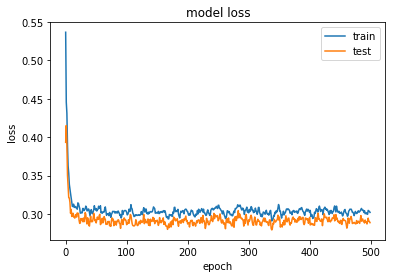

In [10]:
autoencoder = load_model('model.h5')

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)


### 5.1.1 prediction

In [17]:
error_df = pd.DataFrame({'reconstruction_error': mse})
error_df.describe()

,reconstruction_error
count,39.000000
mean,0.201862
std,0.000203
min,0.201519
25%,0.201688
50%,0.201878
75%,0.201988
max,0.202279


okay  according to the result, we concurrently set the threshold as 0.2019

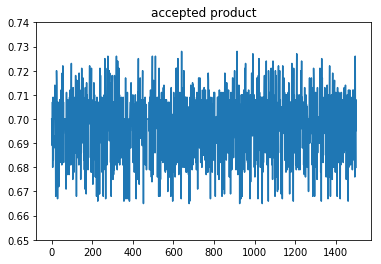

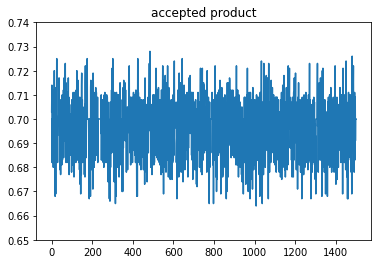

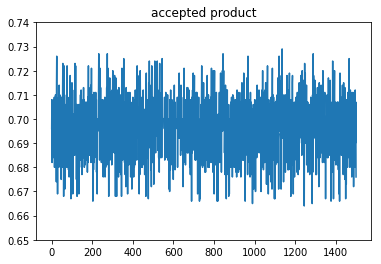

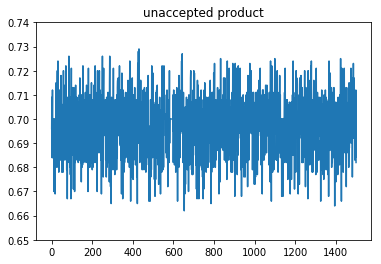

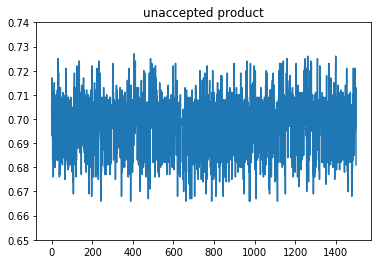

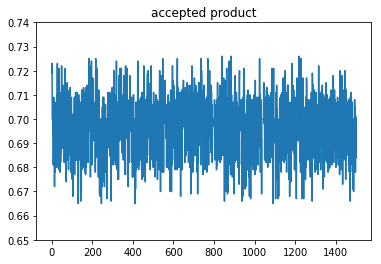

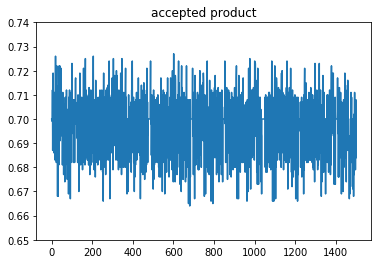

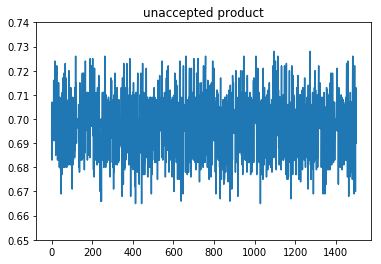

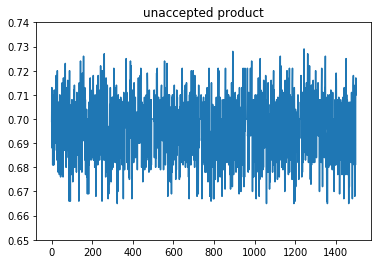

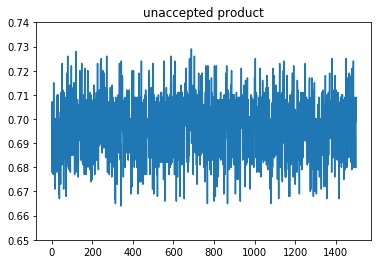

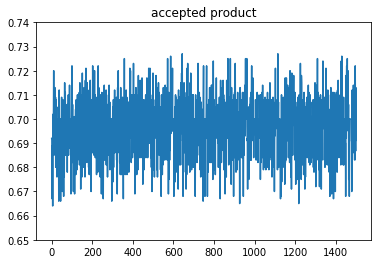

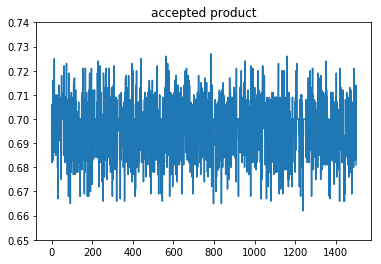

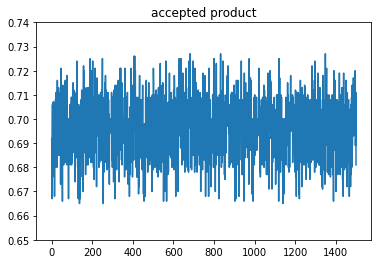

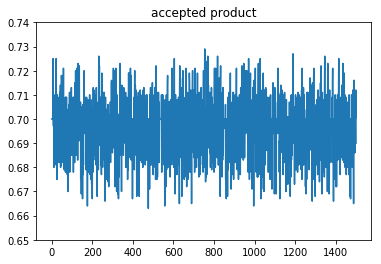

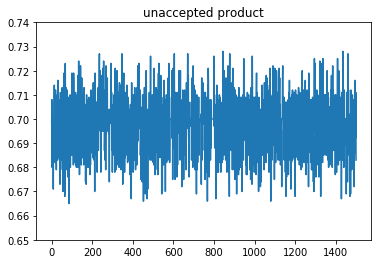

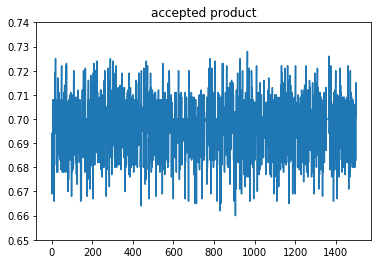

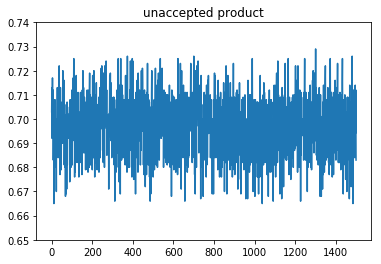

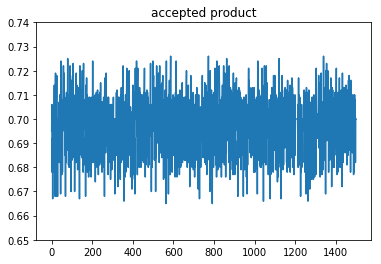

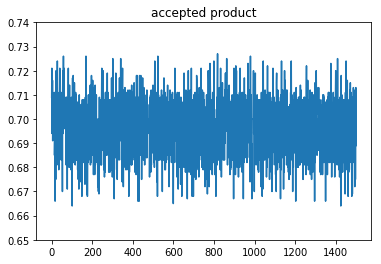

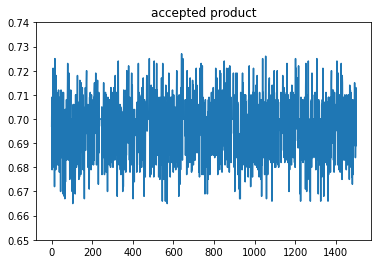

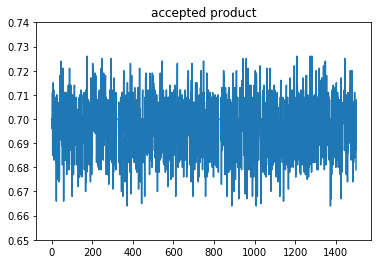

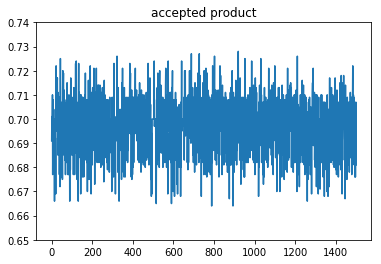

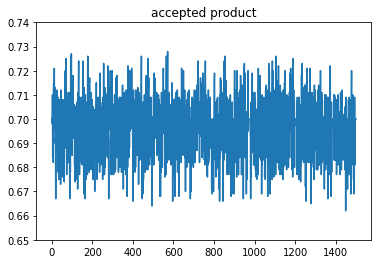

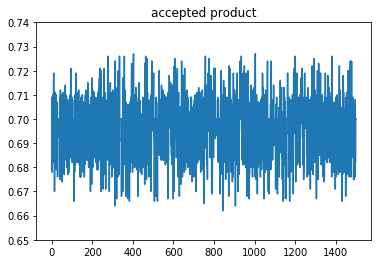

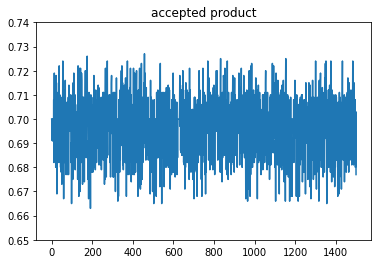

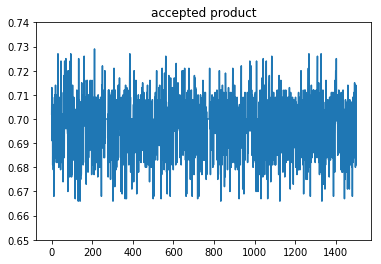

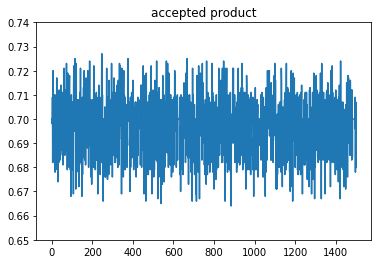

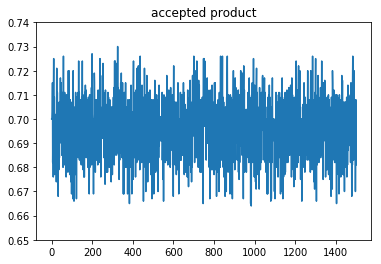

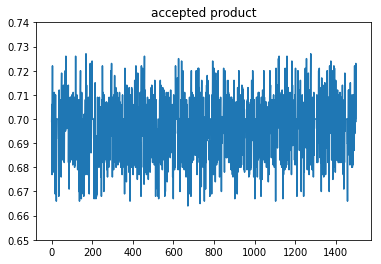

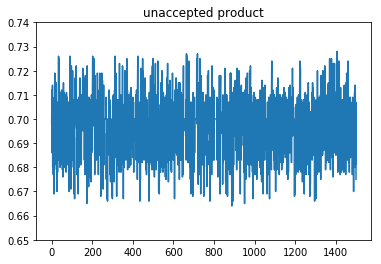

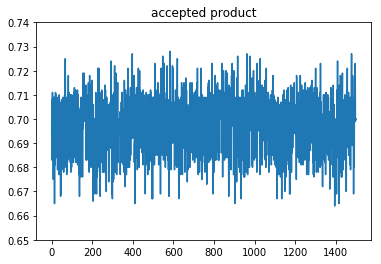

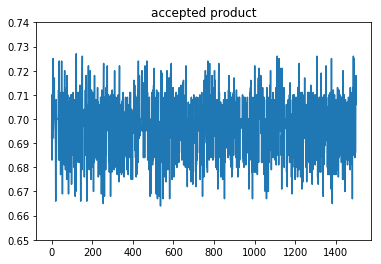

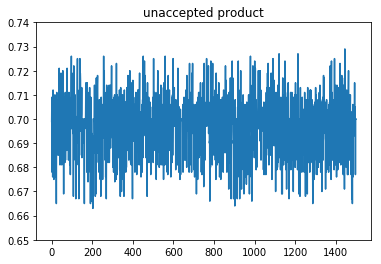

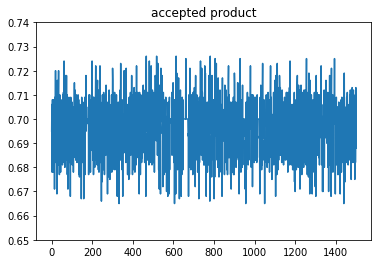

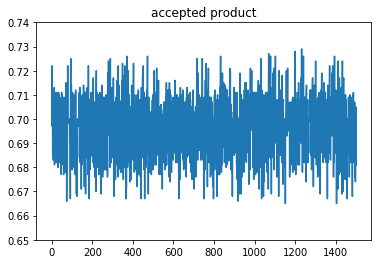

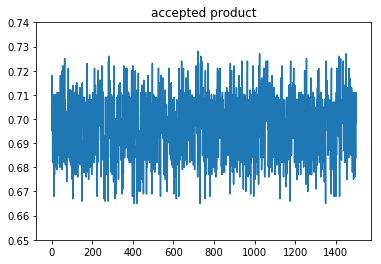

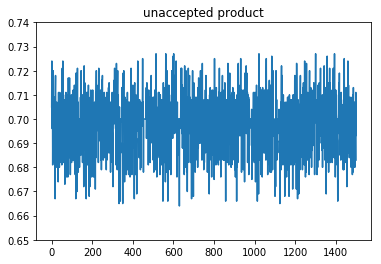

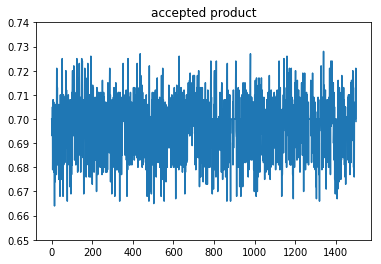

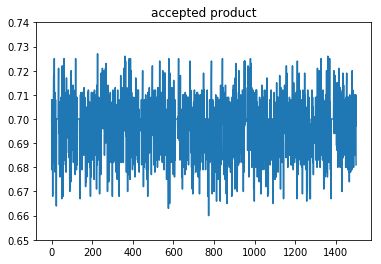

In [27]:
l = len(X_test)
thes = 0.201988
for i in range(l):
    error = np.mean(np.power(X_test[i] - predictions[i], 2))     
    plt.plot(X_test[i])
    if(error>thes):
        plt.title('unaccepted product') #subplot 211 title
    else:
        plt.title('accepted product') #subplot 211 title
    plt.ylim((0.65,0.74))
    plt.show()


In [37]:
len(X_test[1])


1500